In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import os
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf

# %matplotlib notebook

PWD = os.getcwd()

In [2]:
importlib.reload(jm)
# importlib.reload(spf)

alpha = 1
eval_dt = 0.001
max_iter = 10
fileHandle = 'ShearJefferyProblem'

#     norm = np.random.sample(3)
norm = np.array((1, 0, 0))
center = np.array((0, 0, 0))
ellipse_kwargs = {'name':     'ellipse0',
                  'center':   center,
                  'norm':     norm / np.linalg.norm(norm),
                  'velocity': 0.000,
                  'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
problem = jm.ShearJefferyProblem(planeShearRate=(1, 0, 0))
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))

center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)
print(norm_hist)

ShearJefferyProblem: run 10 loops using 0.015557
[[ 1.00000e+00  0.00000e+00 -5.00000e-04]
 [ 1.00000e+00  0.00000e+00 -1.00000e-03]
 [ 9.99999e-01  0.00000e+00 -1.50000e-03]
 [ 9.99998e-01  0.00000e+00 -2.00000e-03]
 [ 9.99997e-01  0.00000e+00 -2.50000e-03]
 [ 9.99996e-01  0.00000e+00 -3.00000e-03]
 [ 9.99994e-01  0.00000e+00 -3.49999e-03]
 [ 9.99992e-01  0.00000e+00 -3.99999e-03]
 [ 9.99990e-01  0.00000e+00 -4.49998e-03]
 [ 9.99988e-01  0.00000e+00 -4.99998e-03]]


ShearJefferyProblem: run 10001 loops using 0.609233


<IPython.core.display.Javascript object>


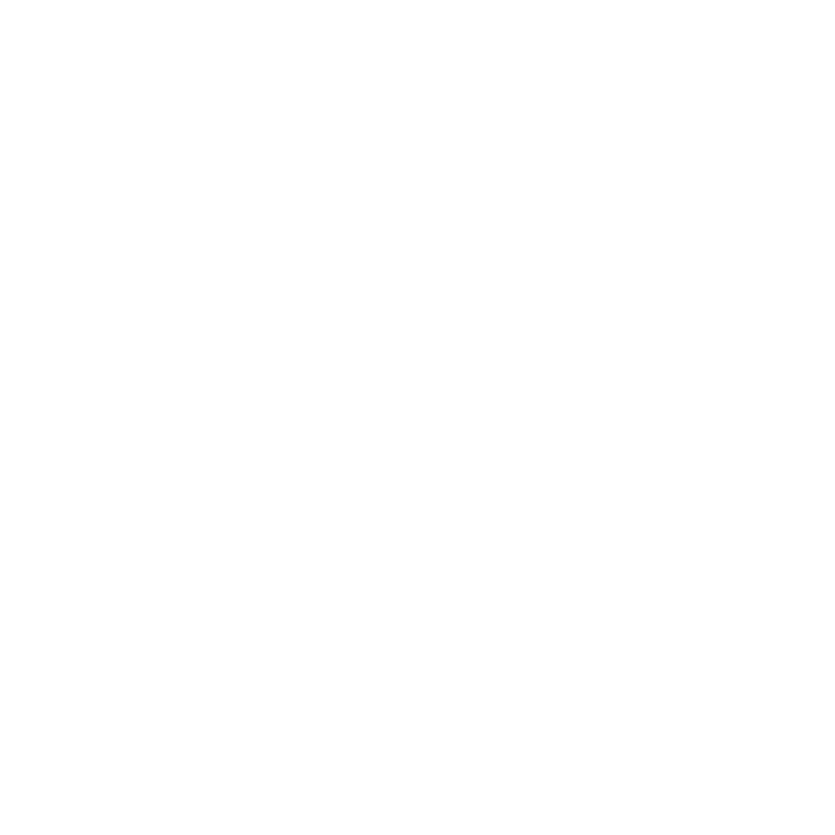

<IPython.core.display.Javascript object>


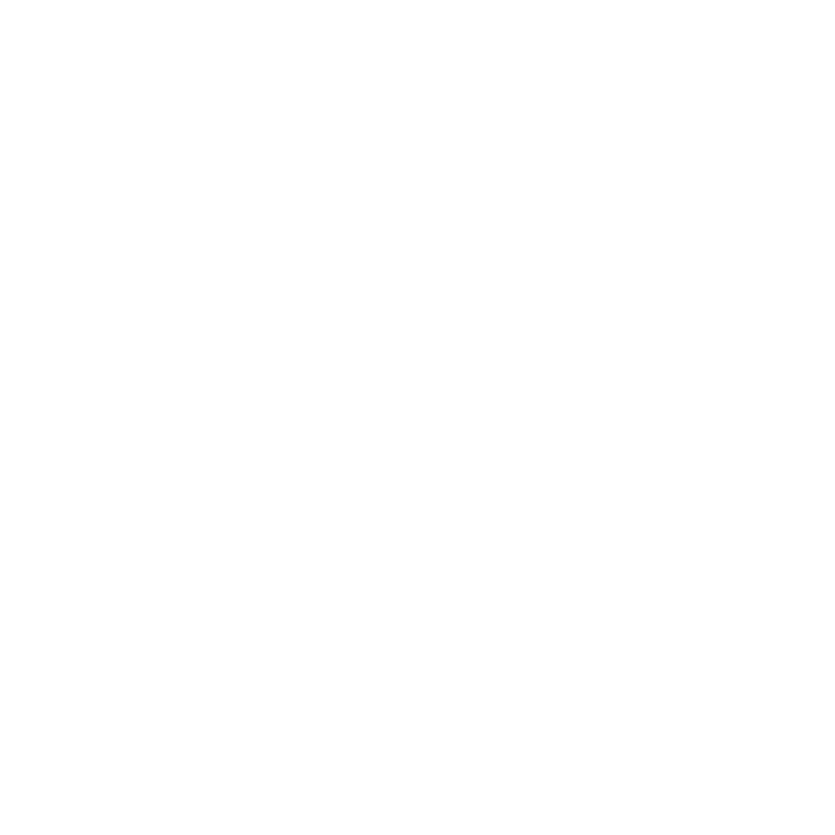

Text(0.5,0.92,'')

<IPython.core.display.Javascript object>


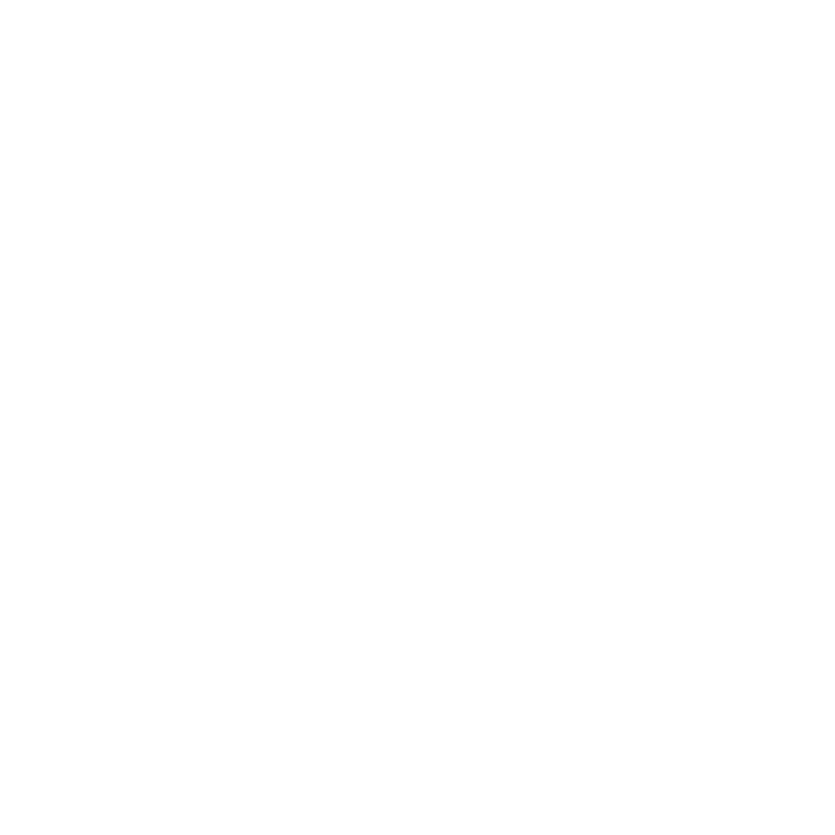

<IPython.core.display.Javascript object>


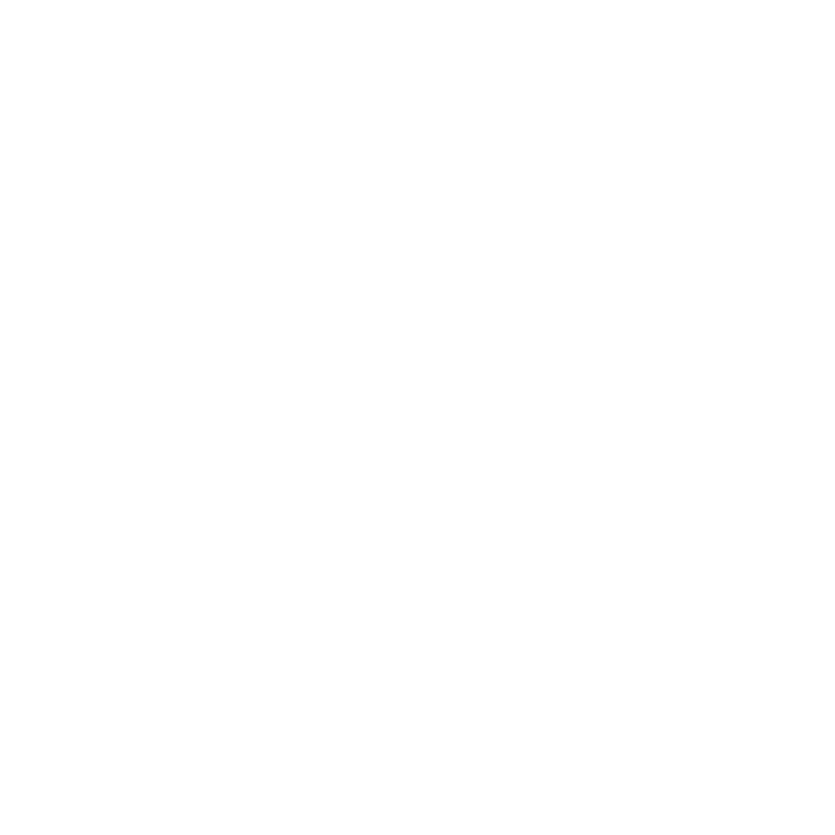

In [21]:
%matplotlib notebook

importlib.reload(jm)
fileHandle = 'ShearJefferyProblem'
eval_dt = 0.015
max_iter = 10001
ellipse_velocity = 0
StokesletsStrength = (1, 0, 0)
n_total = 1   # total of objs to evolution
problem = jm.ShearJefferyProblem(planeShearRate=(1, 0, 0), StokesletsStrength=StokesletsStrength)
    
# generate objs
alpha_list = np.ones(n_total)
norm_list = np.ones((n_total, 3))
center_list = np.ones((n_total, 3))
ellipse_obj_list = []
tn = 0
while tn < n_total:
#     talpha = 10 ** (np.random.sample(1) * 0.6 - 0.3)
#     tnorm = np.random.sample(3) * (1, 0, 1)
#     tcenter = (np.random.sample(3) * 0.2 - (0.1, 0.1, 0.1))
    talpha = 1 / 0.3
    tnorm = np.array((1, 0, 0))
    tcenter = np.array((0, 0, 1))
    tlbd = (talpha ** 2 - 1) / (talpha ** 2 + 1)
    alpha_list[tn] = talpha
    norm_list[tn] = tnorm
    center_list[tn] = tcenter
    tn = tn + 1
    
for tn, (talpha, tnorm, tcenter) in enumerate(zip(alpha_list, norm_list, center_list )):
        ellipse_kwargs = {'name':     'ellipse%03d' % tn,
                          'center':   tcenter,
                          'norm':     tnorm / np.linalg.norm(tnorm),
                          'velocity': ellipse_velocity,
                          'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
        tellipse_obj = jm.JefferyObj(**ellipse_kwargs)
#         tellipse_obj.dbg_set_update_para(fix_x=0, fix_y=0, fix_z=0)
        problem.add_obj(tellipse_obj)
        ellipse_obj_list.append(tellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
t0 = np.arange(max_iter) * eval_dt + eval_dt
for i0, ellipse_obj in enumerate(ellipse_obj_list[:5]):
    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)
    ax0.plot(t0, norm_hist[:, 0], label=i0)
    ax1.plot(t0, norm_hist[:, 1], label=i0)
    ax2.plot(t0, norm_hist[:, 2], label=i0)
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    axi.set_xlabel('time')
    axi.set_ylabel('norm_%s' % axyi)
    # axi.legend()
plt.tight_layout()

t_stp = max_iter // 100
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = Axes3D(fig)
# ax0 = fig.add_subplot(1, 1, 1, projection='3d')
cm = plt.get_cmap('cool')
color_len = center_hist[::t_stp, 0].size
colors = [cm(1.*i/color_len) for i in range(color_len)]
ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
           norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
           length=0.0001*max_iter, arrow_length_ratio=0.2, pivot='middle', normalize=False, colors=colors)
spf.set_axes_equal(ax0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')
ax0.set_title('')


In [20]:
importlib.reload(jm)
fileHandle = 'ShearJefferyProblem'
job_dir = 'head_shear_velocity1a'
job_name = 'eq_a01.00_z00.50'
talpha = 1 / 1
tcenter = np.array((0, 0, 0.5))
ellipse_velocity = 0
tnorm = np.array((1, 0, 0))
planeShearRate = (2, 0, 0)

mat_path = os.path.join(PWD, job_dir, job_name)
mat_contents = loadmat(mat_path)
ecoli_center = mat_contents['ecoli_center']
ecoli_norm = mat_contents['ecoli_norm']
ecoli_U = mat_contents['ecoli_U']
eval_t = mat_contents['t'].flatten()
eval_dt = np.mean(np.diff(eval_t))
max_iter = eval_t.size * 10

print(eval_t.shape)

(1001, 3)


ShearJefferyProblem: run 6002 loops using 0.410255


Text(0.5, 0.92, '')

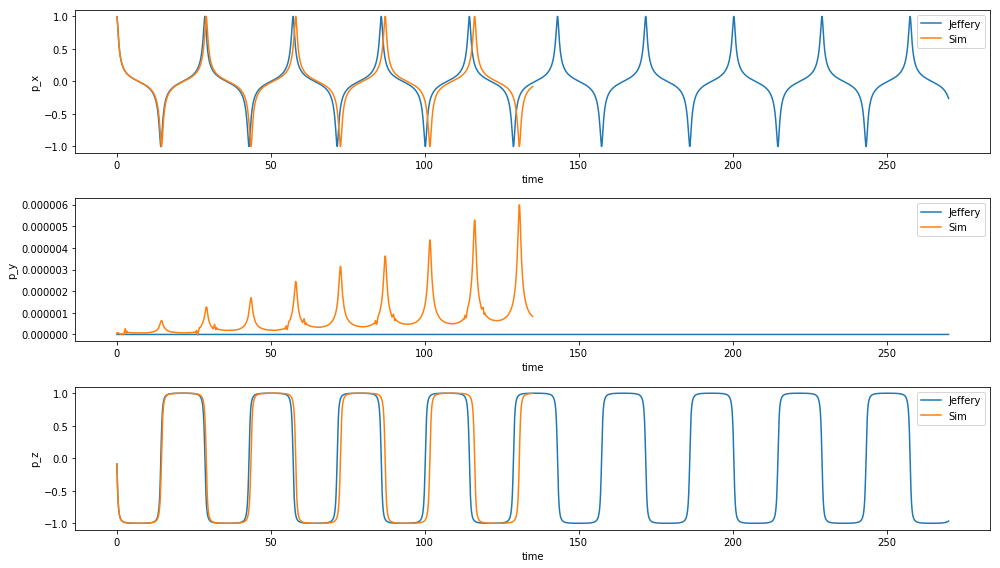

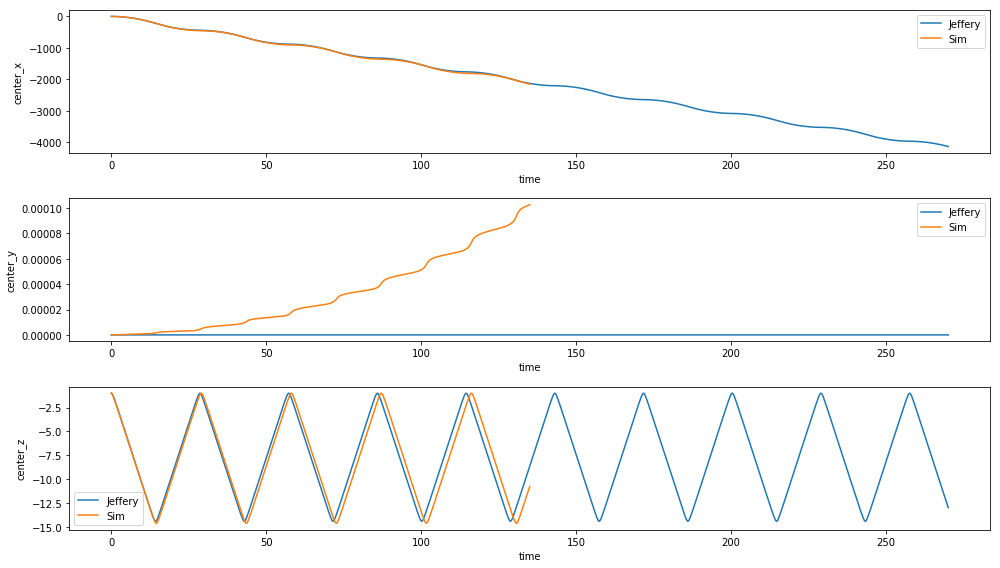

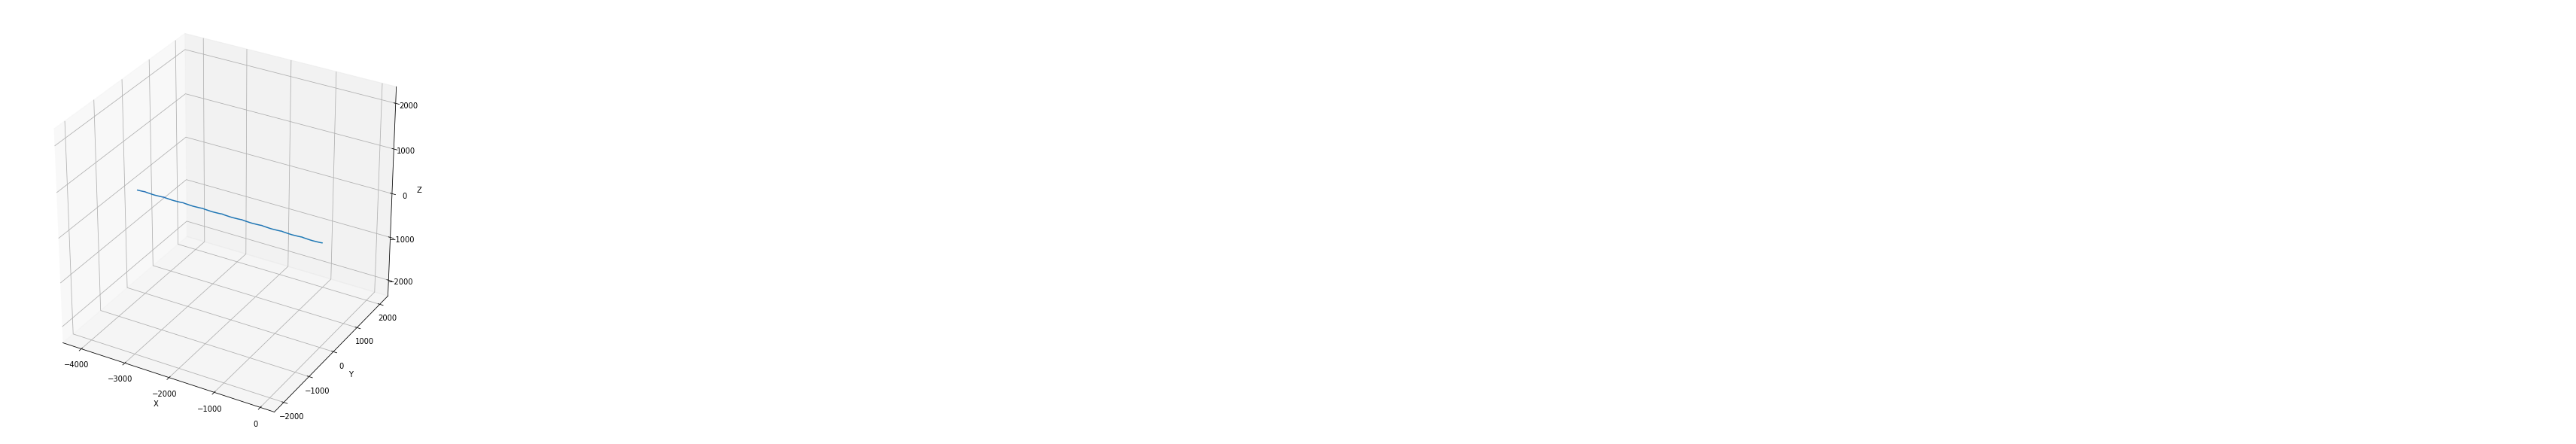

In [17]:
%matplotlib inline

importlib.reload(jm)
fileHandle = 'ShearJefferyProblem'
job_dir = 'head_shear_velocity1a'
job_name = 'eq_a09.00_z-1.00'
talpha = 1 / 9
tcenter = np.array((0, 0, -1))
ellipse_velocity = 1
tnorm = np.array((1, 0, 0))
planeShearRate = (2, 0, 0)

mat_path = os.path.join(PWD, job_dir, job_name)
mat_contents = loadmat(mat_path)
ecoli_center = mat_contents['ecoli_center']
ecoli_norm = mat_contents['ecoli_norm']
ecoli_U = mat_contents['ecoli_U']
eval_t = mat_contents['t'].flatten()
eval_dt = np.mean(np.diff(eval_t))
max_iter = eval_t.size * 2
problem = jm.ShearJefferyProblem(planeShearRate=planeShearRate)

ellipse_kwargs = {'name':     job_name,
                  'center':   tcenter,
                  'norm':     tnorm / np.linalg.norm(tnorm),
                  'velocity': ellipse_velocity,
                  'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
# ellipse_obj.dbg_set_update_para(fix_x=0, fix_y=0, fix_z=0)
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
t0 = np.arange(max_iter) * eval_dt + eval_dt
center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)
ax0.plot(t0, norm_hist[:, 0], label='Jeffery')
ax1.plot(t0, norm_hist[:, 1], label='Jeffery')
ax2.plot(t0, norm_hist[:, 2], label='Jeffery')
ax0.plot(eval_t, ecoli_norm[:, 0], label='Sim')
ax1.plot(eval_t, ecoli_norm[:, 1], label='Sim')
ax2.plot(eval_t, ecoli_norm[:, 2], label='Sim')
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    axi.set_xlabel('time')
    axi.set_ylabel('p_%s' % axyi)
    axi.legend()
plt.tight_layout()

# fig = plt.figure(figsize=(14, 8))
# fig.patch.set_facecolor('white')
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
# t0 = np.arange(max_iter) * eval_dt + eval_dt
# center_hist = np.vstack(ellipse_obj.center_hist)
# U_hist = np.vstack(ellipse_obj.U_hist)
# norm_hist = np.vstack(ellipse_obj.norm_hist)
# ax0.plot(eval_t, (norm_hist[:, 0] - ecoli_norm[:, 0]))
# ax1.plot(eval_t, (norm_hist[:, 1] - ecoli_norm[:, 1]))
# ax2.plot(eval_t, (norm_hist[:, 2] - ecoli_norm[:, 2]))
# for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
#     axi.set_xlabel('time')
#     axi.set_ylabel('err_%s' % axyi)
# #     axi.legend()
# plt.tight_layout()

fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
t0 = np.arange(max_iter) * eval_dt + eval_dt
center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)
ax0.plot(t0, center_hist[:, 0], label='Jeffery')
ax1.plot(t0, center_hist[:, 1], label='Jeffery')
ax2.plot(t0, center_hist[:, 2], label='Jeffery')
ax0.plot(eval_t, ecoli_center[:, 0], label='Sim')
ax1.plot(eval_t, ecoli_center[:, 1], label='Sim')
ax2.plot(eval_t, ecoli_center[:, 2], label='Sim')
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    axi.set_xlabel('time')
    axi.set_ylabel('center_%s' % axyi)
    axi.legend()
plt.tight_layout()

t_stp = max_iter // 100
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax0 = Axes3D(fig)
# ax0 = fig.add_subplot(1, 1, 1, projection='3d')
cm = plt.get_cmap('cool')
color_len = center_hist[::t_stp, 0].size
colors = [cm(1.*i/color_len) for i in range(color_len)]
ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
           norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
           length=0.0001*max_iter, arrow_length_ratio=0.2, pivot='middle', normalize=False, colors=colors)
spf.set_axes_equal(ax0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')
ax0.set_title('')


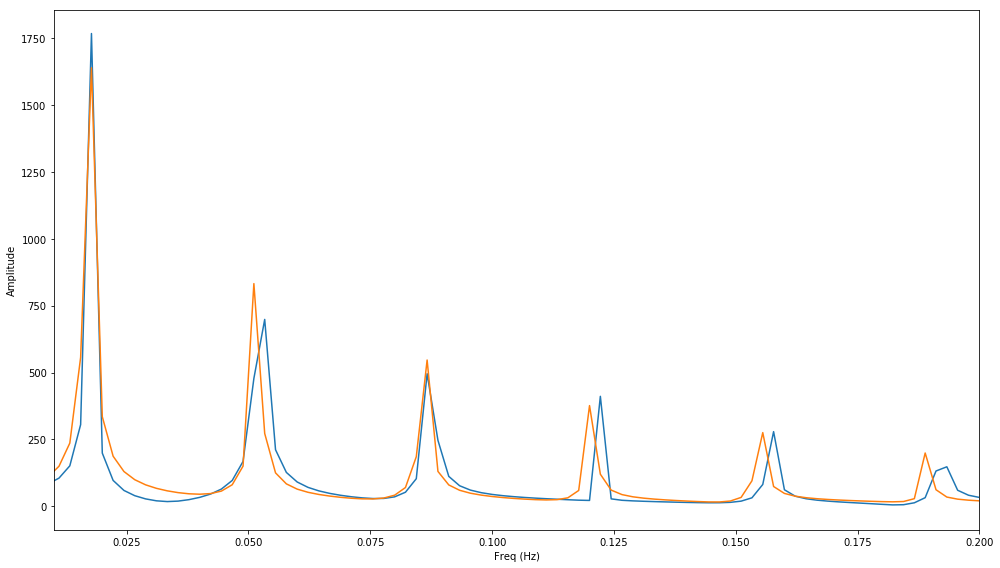

In [16]:
# n = len(y) # length of the signal
# k = np.arange(n)
# T = n/Fs
# frq = k/T # two sides frequency range
# frq = frq[range(n/2)] # one side frequency range

# Y = np.fft.fft(y)/n # fft computing and normalization
# Y = Y[range(n/2)]

norm_fft = np.fft.rfft(norm_hist[:, 0])
norm_freq = np.fft.rfftfreq(norm_hist.shape[0], eval_dt)
ecoli_norm_fft = np.fft.rfft(ecoli_norm[:, 0])
ecoli_norm_freq = np.fft.rfftfreq(ecoli_norm.shape[0], eval_dt)

fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)
ax0.plot(norm_freq, np.abs(norm_fft))
ax0.plot(ecoli_norm_freq, np.abs(ecoli_norm_fft))
ax0.set_xlim(0.01, 0.2)
ax0.set_xlabel('Freq (Hz)')
ax0.set_ylabel('Amplitude')
plt.tight_layout()

ShearJefferyProblem: run 1000 loops using 0.056208


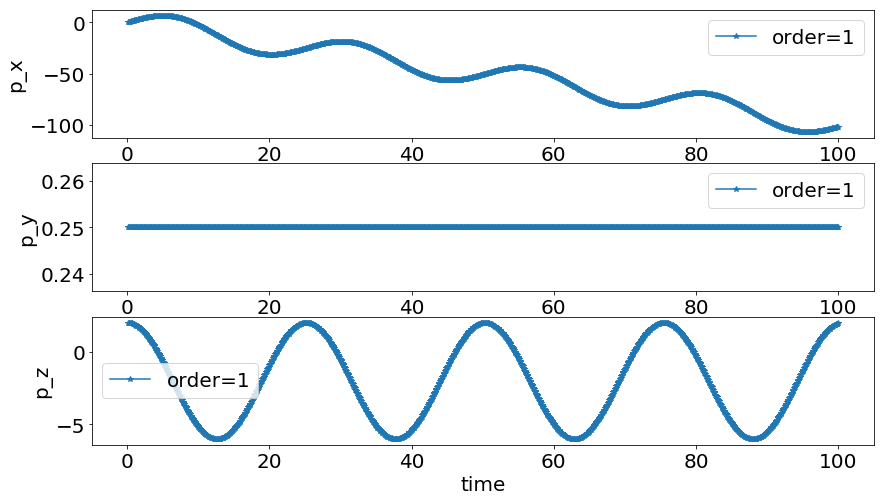

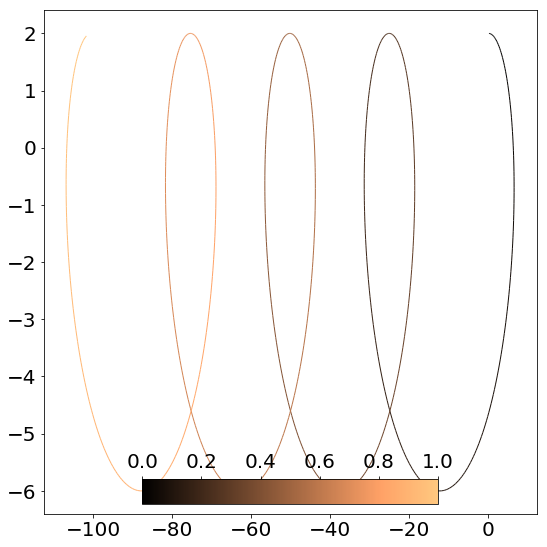

In [113]:
%matplotlib inline
importlib.reload(jm)
importlib.reload(spf)

fileHandle = 'ShearJefferyProblem'
job_dir = 'head_shear1c'
update_order_list = [1]
fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
ax3 = fig.add_subplot(1, 1, 1)

talpha = 1 / 1
ellipse_velocity = 1
tnorm = np.array((1, 0, 0))
tcenter = np.array((0, 0, 2))
planeShearRate = np.array((0.5, 0, 0))
for update_order in update_order_list:
    job_name = 'eq_a00.10_o%1d' % update_order
    mat_path = os.path.join(PWD, job_dir, job_name)
    mat_contents = loadmat(mat_path)
    ecoli_center = mat_contents['ecoli_center']
    ecoli_norm = mat_contents['ecoli_norm']
    ecoli_U = mat_contents['ecoli_U']
    eval_t = mat_contents['t'].flatten()

    eval_dt = np.mean(np.diff(eval_t))
    max_iter = eval_t.size // 10
    problem = jm.ShearJefferyProblem(planeShearRate=planeShearRate)

    ellipse_kwargs = {'name':     job_name,
                      'center':   tcenter,
                      'norm':     tnorm / np.linalg.norm(tnorm),
                      'velocity': ellipse_velocity,
                      'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
    ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
    ellipse_obj.set_update_para(fix_x=False, fix_y=False, fix_z=False, update_fun=Adams_Bashforth_Methods, update_order=update_order)
    problem.add_obj(ellipse_obj)

    # evaluation loop
    t0 = time()
    for idx in range(1, max_iter + 1):
        problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
    t1 = time()
    print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))

    t0 = np.arange(max_iter) * eval_dt + eval_dt
    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)
#     ax0.plot(t0, norm_hist[:, 0], label='order=%1d' % update_order)
#     ax1.plot(t0, norm_hist[:, 1], label='order=%1d' % update_order)
#     ax2.plot(t0, norm_hist[:, 2], label='order=%1d' % update_order)
#     ax0.plot(eval_t, ecoli_norm[:, 0], label='order=%1d' % update_order)
#     ax1.plot(eval_t, ecoli_norm[:, 1], label='order=%1d' % update_order)
#     ax2.plot(eval_t, ecoli_norm[:, 2], label='order=%1d' % update_order)
    ax0.plot(t0, center_hist[:, 0], '-*', label='order=%1d' % update_order)
#     ax1.plot(t0, center_hist[:, 1], '-*', label='order=%1d' % update_order)
    ax1.plot(t0, np.linalg.norm(U_hist[:, 3:], axis=1), '-*', label='order=%1d' % update_order)
    ax2.plot(t0, center_hist[:, 2], '-*', label='order=%1d' % update_order)
    for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
        axi.set_xlabel('time')
        axi.set_ylabel('p_%s' % axyi)
        axi.legend()
    # ax0.set_xlim(900, 1000)
    plt.tight_layout()
    line1, = ax3.plot(center_hist[:, 0], center_hist[:, 2], label='order=%1d' % update_order)
    line1.remove()
    lc = spf.colorline(center_hist[:, 0], center_hist[:, 2], ax=ax3, linewidth=1)
#     ax3.set_xlim(-4, 4)
#     ax3.set_ylim(-4, 4)
    cbaxes = inset_axes(ax3, width="60%", height="5%", loc=8) 
    plt.colorbar(lc, cax=cbaxes, orientation='horizontal')
    cbaxes.xaxis.set_ticks_position('top')
    plt.tight_layout()

# fig = plt.figure(figsize=(14, 8))
# fig.patch.set_facecolor('white')
# ax0 = fig.add_subplot(3, 1, 1)
# ax1 = fig.add_subplot(3, 1, 2)
# ax2 = fig.add_subplot(3, 1, 3)
# t0 = np.arange(max_iter) * eval_dt + eval_dt
# center_hist = np.vstack(ellipse_obj.center_hist)
# U_hist = np.vstack(ellipse_obj.U_hist)
# norm_hist = np.vstack(ellipse_obj.norm_hist)
# ax0.plot(eval_t, (norm_hist[:, 0] - ecoli_norm[:, 0]))
# ax1.plot(eval_t, (norm_hist[:, 1] - ecoli_norm[:, 1]))
# ax2.plot(eval_t, (norm_hist[:, 2] - ecoli_norm[:, 2]))
# for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
#     axi.set_xlabel('time')
#     axi.set_ylabel('err_%s' % axyi)
#     # axi.legend()
# plt.tight_layout()

# t_stp = max_iter // 100
# fig = plt.figure(figsize=(8, 8))
# fig.patch.set_facecolor('white')
# ax0 = Axes3D(fig)
# # ax0 = fig.add_subplot(1, 1, 1, projection='3d')
# cm = plt.get_cmap('cool')
# color_len = center_hist[::t_stp, 0].size
# colors = [cm(1.*i/color_len) for i in range(color_len)]
# ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
# ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
#            norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
#            length=0.0001*max_iter, arrow_length_ratio=0.2, pivot='middle', normalize=False, colors=colors)
# spf.set_axes_equal(ax0)
# ax0.set_xlabel('X')
# ax0.set_ylabel('Y')
# ax0.set_zlabel('Z')
# ax0.set_title('')



In [110]:
np.linalg.norm(U_hist[:, 3:], axis=1)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0